# Hyperparameter Tunning

## Classification Data Set

### Data Preprocessing

In [90]:
import pandas as pd

df = pd.read_csv('data/body_performance.csv')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [37]:
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [91]:
df['gender'] = df['gender'].astype('category').cat.codes
df['class'] = df['class'].astype('category').cat.codes

df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1


In [92]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['class'])
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

### KNN

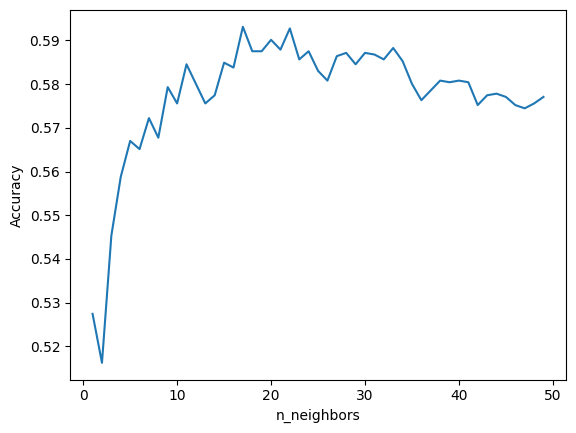

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


neighbors = range(1, 50)
accuracy = []

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    accuracy.append(score)

plt.plot(neighbors, accuracy)
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [43]:
print('Highest accuracy score:', np.max(accuracy))
print('Best n_neighbors:', np.argmax(accuracy) + 1)

Highest accuracy score: 0.5931317655841732
Best n_neighbors: 17


The accuracy score improves drastically in the beginning when the number of neighbors is increased to 5, which is the default parameter for the KNeighborsClassifier. After that, the accuracy score decreases and increases again jerkily. It decreases at a faster rate after n_neighbours = 33. The best n_neighbours parameter is 17, which results in an accuracy score of 0.59.

### Decision Tree

Best accuracy score for gini: 0.6812243374393431
Best max_depth for gini: 9
Best max_features for gini:  7
Best accuracy score for entropy: 0.6700261291526689
Best max_depth for entropy: 9
Best max_features for entropy:  9


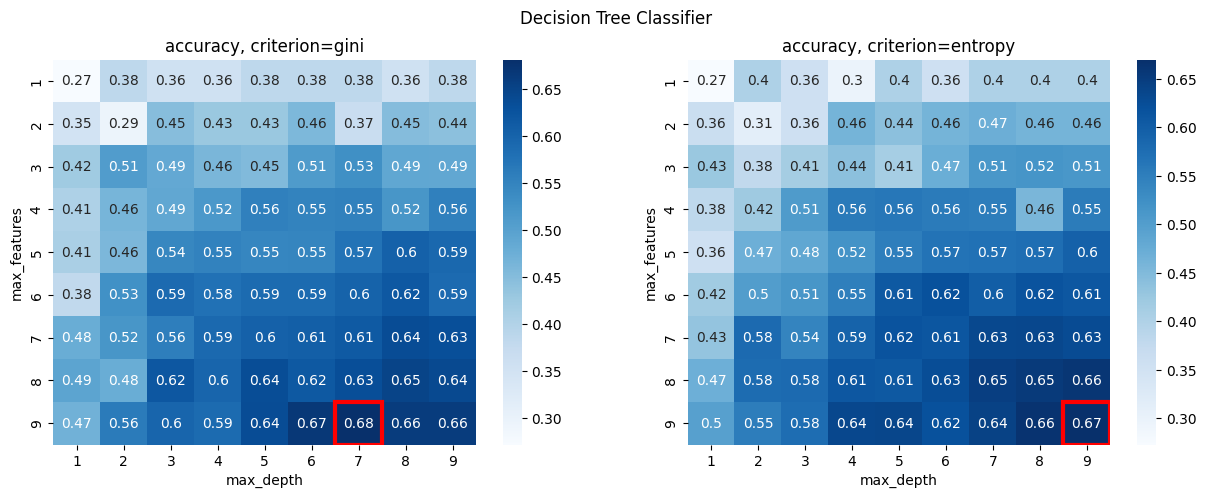

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


def get_accuracy(criterion):
    for depth in max_depth:
        for feature in max_features:
            tree = DecisionTreeClassifier(criterion=criterion, max_depth=depth, max_features=feature)
            tree.fit(X_train, y_train)
            y_pred = tree.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            accuracy.loc[depth, feature] = acc
    return accuracy


max_depth = range(1, 10)
max_features = range(1, 10)
criteria = ['gini', 'entropy']

accuracy = pd.DataFrame(0, index=max_depth, columns=max_features)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Decision Tree Classifier')

for i, criterion in enumerate(criteria):
    accuracy = get_accuracy(criterion)

    sns.heatmap(accuracy, annot=True, cmap='Blues', ax=axes[i])
    axes[i].set_xlabel('max_depth')
    axes[i].set_ylabel('max_features')
    axes[i].set_title(f'accuracy, criterion={criterion}')

    max_acc = accuracy.max().max()
    max_acc_idx = np.where(accuracy == max_acc)
    best_max_depth = max_acc_idx[0][0] + 1
    best_max_features = max_acc_idx[1][0] + 1
    rect = plt.Rectangle((max_acc_idx[1][0], max_acc_idx[0][0]), 1, 1, fill=False, edgecolor='red', lw=3)
    axes[i].add_patch(rect)

    print(f'Best accuracy score for {criterion}:', max_acc)
    print(f'Best max_depth for {criterion}:', best_max_depth)
    print(f'Best max_features for {criterion}: ', best_max_features)

plt.show()

The gini criterion performs slightly better than the entropy criterion, with the highest accuracy score of 0.68. For both criteria, the best max_features is 9. For gini, the most optimal max_depth is 7, while for entropy, the most optimal max_depth is 9.

Overall, the heatmaps show that the accuracy score is not very sensitive to the change of max_depth and max_features after a certain point.

### Random Forest

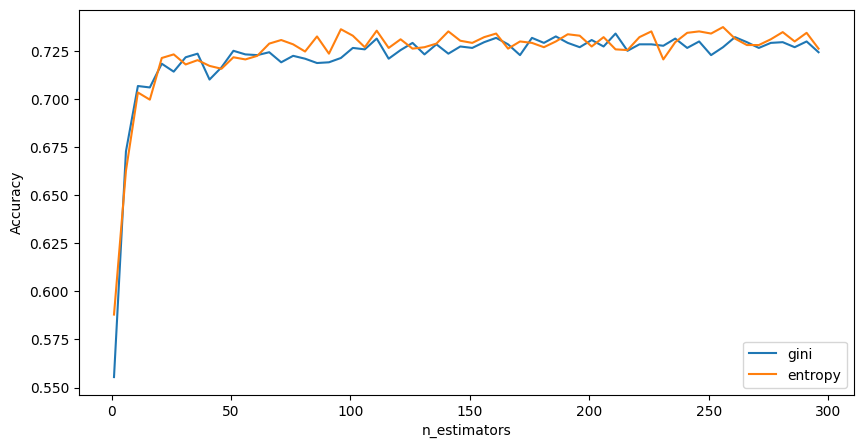

In [40]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = range(1, 300, 5)
criteria = ['gini', 'entropy']

accuracy = pd.DataFrame(0, index=n_estimators, columns=criteria)

for n in n_estimators:
    for criterion in criteria:
        tree = RandomForestClassifier(n_estimators=n, criterion=criterion)
        tree.fit(X_train, y_train)
        y_pred = tree.predict(X_test)
        accuracy.loc[n, criterion] = accuracy_score(y_test, y_pred)

plt.figure(figsize=(10, 5))
plt.plot(n_estimators, accuracy['gini'], label='gini')
plt.plot(n_estimators, accuracy['entropy'], label='entropy')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [41]:
print('Highest accuracy score:', accuracy.max().max())
print('n_estimators=', accuracy.idxmax().max())
print('criterion=', accuracy.idxmax().idxmax())

Highest accuracy score: 0.7372153788727137
n_estimators= 256
criterion= entropy


Generally, as the value of n_estimators increases, the accuracy score also increases at first, with some fluctuations later. 
The best combination of parameters is n_estimators = 256, criterion = 'entropy', which results in an accuracy score of 0.73.

### SVC

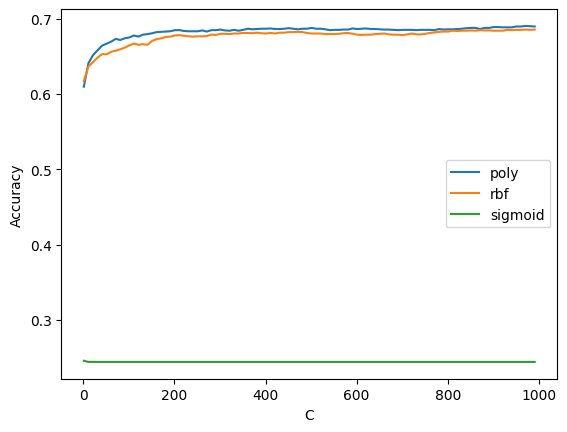

In [36]:
from sklearn.svm import SVC

C = range(1, 1000, 10)

kernels = ['poly', 'rbf', 'sigmoid']
accuracy = pd.DataFrame(0, index=C, columns=kernels)

for c in C:
    for kernel in kernels:
        clf = SVC(kernel=kernel, C=c)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy.loc[c, kernel] = accuracy_score(y_test, y_pred)

for kernel in kernels:
    plt.plot(C, accuracy[kernel], label=kernel)

plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [39]:
print('Highest accuracy score:', accuracy.max().max())
print('Best kernel:', accuracy.max().idxmax())
print('Best C:', accuracy.idxmax().max())

Highest accuracy score: 0.6901829040686823
Best C: poly
Best kernel: 971


It clear that the sigmoid kernel has the worst performance, no matter the value of C. The linear kernel and the rbf kernel have similar performance, while the poly kernel has the best performance. The best combination of parameters is C = 971, kernel = 'poly', which results in an accuracy score of 0.69.

(I know that the text for "Best C" and "Best Kernel" should be switched, but the code above took 91 minutes to run, so I don't want to have to run it again.)

## Regression Data Set

### Data Preprocessing

In [47]:
import pandas as pd

df = pd.read_csv('data/electric_motor.csv')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3465 entries, 0 to 3464
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   u_q             3465 non-null   float64
 1   coolant         3465 non-null   float64
 2   stator_winding  3465 non-null   float64
 3   u_d             3465 non-null   float64
 4   stator_tooth    3465 non-null   float64
 5   motor_speed     3465 non-null   float64
 6   i_d             3465 non-null   float64
 7   i_q             3465 non-null   float64
 8   pm              3465 non-null   float64
 9   stator_yoke     3465 non-null   float64
 10  ambient         3465 non-null   float64
 11  torque          3465 non-null   float64
 12  profile_id      3465 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 352.0 KB


In [23]:
df.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


In [49]:
df = df.drop('profile_id', axis=1)

df.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197


In [50]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['torque'])
y = df['torque']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

### KNN

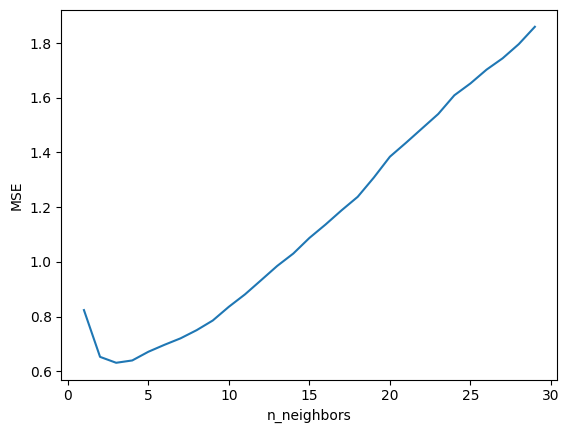

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

neighbors = range(1, 30)
mse = []

for n in neighbors:
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse.append(mean_squared_error(y_test, y_pred))

plt.plot(neighbors, mse)
plt.xlabel('n_neighbors')
plt.ylabel('MSE')
plt.show()

In [24]:
print('Lowest MSE:', np.min(mse))
print('Best n_neighbors:', np.argmin(mse) + 1)

Lowest MSE: 0.6308428346962962
Best n_neighbors: 3


Based on the line plot, the lowest mean squared error is achieved when n_neighbours = 3, which is close the default parameter for the KNeighborsRegressor (5). The mean squared error increases afterwards.

### Decision Tree 

Lowest MSE for friedman_mse: 0.07038347862572242
Best max_depth for friedman_mse: 1
Best max_features for friedman_mse: 3
Lowest MSE for squared_error: 0.0778553264388554
Best max_depth for squared_error: 8
Best max_features for squared_error: 2


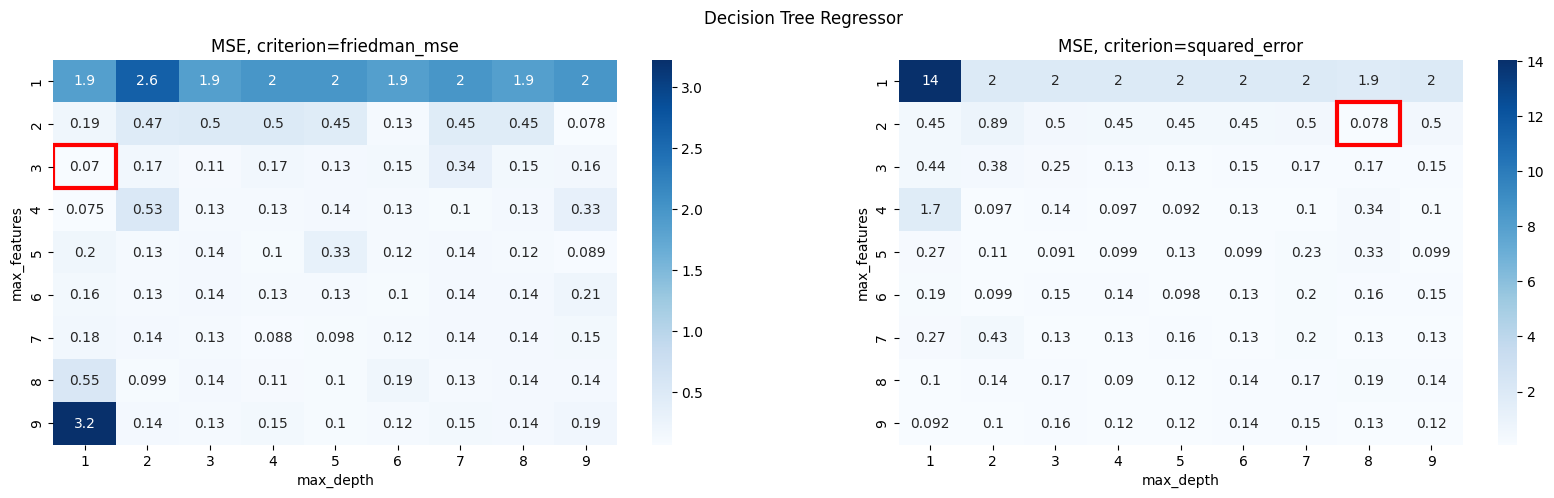

In [88]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


def get_mse(criterion):
    for depth in max_depth:
        for feature in max_features:
            tree = DecisionTreeRegressor(
                criterion=criterion, max_depth=depth, max_features=feature)
            tree.fit(X_train, y_train)
            y_pred = tree.predict(X_test)
            mse.loc[depth, feature] = mean_squared_error(y_test, y_pred)
    return mse


max_depth = range(1, 10)
max_features = range(1, 10)
# 'squared_error' (default) to avoid ValueError: Some value(s) of y are negative which is not allowed for Poisson regression.
criteria = ['friedman_mse', 'squared_error']
mse = pd.DataFrame(0, index=max_depth, columns=max_features)

fig, axes = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Decision Tree Regressor')

for i, criterion in enumerate(criteria):
    mse = get_mse(criterion)

    sns.heatmap(mse, annot=True, cmap='Blues', ax=axes[i])
    axes[i].set_xlabel('max_depth')
    axes[i].set_ylabel('max_features')
    axes[i].set_title(f'MSE, criterion={criterion}')

    min_mse = mse.min().min()
    min_mse_idx = np.where(mse == min_mse)
    best_max_depth = min_mse_idx[1][0] + 1
    best_max_features = min_mse_idx[0][0] + 1
    rect = plt.Rectangle((min_mse_idx[1][0], min_mse_idx[0][0]), 1, 1, fill=False, edgecolor='red', lw=3)
    axes[i].add_patch(rect)

    print(f'Lowest MSE for {criterion}:', min_mse)
    print(f'Best max_depth for {criterion}:', best_max_depth)
    print(f'Best max_features for {criterion}:', best_max_features)

plt.show()

The criterion friedman_mse leads to the shortest mean squared error of 0.07, at max_depth = 1 and max_features = 3. Meanwhile, the criterion squared_error scores the to the minimum MSE at max_depth = 8 and max_features = 2.

For both criteria, max_depth = 1 can lead the highest MSE value, althougt it depends on the value of max_features a lot. Overall, the heatmaps, especially the one for mean_squared_error, show that the MSE is not very sensitive to the change of max_depth and max_features after a certain point.

### Random Forest 

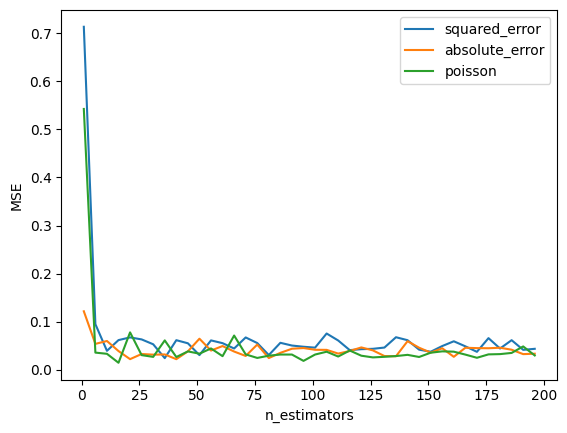

In [31]:
from sklearn.ensemble import RandomForestRegressor

n_estimators = range(1, 200, 5)
criteria = ['squared_error', 'absolute_error', 'poisson']

mse = pd.DataFrame(0, index=n_estimators, columns=criteria)

for n in n_estimators:
    for criterion in criteria:
        tree = RandomForestRegressor(n_estimators=n, criterion=criterion)
        tree.fit(X_train, y_train)
        y_pred = tree.predict(X_test)
        mse.loc[n, criterion] = mean_squared_error(y_test, y_pred)

for criterion in criteria:
    plt.plot(n_estimators, mse[criterion], label=criterion)

plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [33]:
print('Lowest MSE:', mse.min().min())
print('Best n_estimators:', mse.idxmin().min())
print('Best criterion:', mse.min().idxmin())

Lowest MSE: 0.014385661415009594
Best n_estimators: 16
Best criterion: poisson


Generally, as the value of n_estimators increases, the MSE decreases at first, with some fluctuations later. The best combination of parameters is n_estimators = 16, criterion = 'poisson', which results in a mean squared error of 0.014.

### SVR

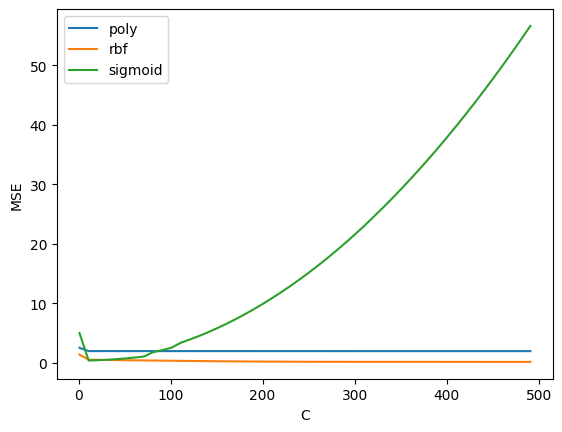

In [29]:
from sklearn.svm import SVR

C = range(1, 500, 10)
kernels = ['poly', 'rbf', 'sigmoid']

mse = pd.DataFrame(0, index=C, columns=kernels)

for c in C:
    for kernel in kernels:
        clf = SVR(kernel=kernel, C=c)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        mse.loc[c, kernel] = mean_squared_error(y_test, y_pred)

for kernel in kernels:
    plt.plot(C, mse[kernel], label=kernel)

plt.xlabel('C')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [30]:
print('Lowest MSE:', mse.min().min())
print('Best kernel:', mse.min().idxmin())
print('Best C:', mse.idxmin().min())

Lowest MSE: 0.16025790751189176
Best kernel: rbf
Best C: 11


It clear that the sigmoid kernel has the worst performance as the value of C increases. The linear and the rbf kernels have similar performance, but the rbf kernel slighly outperforms. The value of C does not seem to have a significant impact on their performance. 
The best combination of parameters is C = 11, kernel = 'rbf', which results in MSE of 0.16.